#### Applying K-Means Clustering Algorithm to the dataset named "Final_E_Commerce_Dataset"

 ### A dataset containing detailed transactional data related to customer purchases on an e-commerce platform. 

Importing all the required libraries required for applying the algorithm since all the packages are pre-installed.

--> Numpy - It is a powerful numerical computing library in Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.

--> Pandas - It is a powerful and popular open-source data manipulation and analysis library for Python. It provides data structures for efficiently storing and manipulating large datasets, along with tools for reading and writing data in different file formats.

--> Sklearn - Scikit-learn is a popular machine learning library for Python that provides simple and efficient tools for data analysis and modeling. It is built on NumPy, SciPy, and Matplotlib and provides a wide range of machine learning algorithms for tasks such as classification, regression, clustering, and dimensionality reduction.

--> matplotlib - It is a comprehensive 2D plotting library for Python. It produces high-quality static, animated, and interactive visualizations in Python. Matplotlib is designed to work seamlessly with NumPy, providing an easy way to visualize data and results from numerical computations.

--> seaborn - It is a comprehensive 2D plotting library for Python. It produces high-quality static, animated, and interactive visualizations in Python. Matplotlib is designed to work seamlessly with NumPy, providing an easy way to visualize data and results from numerical computations.

--> Setting OMP_NUM_THREADS to '1' is a way to control the number of threads that Open MP-enabled programs will use. By setting it to '1', we are instructing the program to use only one thread, effectively limiting parallelism.

In [49]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#running before importing k means
import os 
os.environ["OMP_NUM_THREADS"] = '1'

In [50]:
#We are now going to use the read_csv() function in the pandas library to read our "Final_E_Commerce_Dataset.csv" dataset into a pandas Data Frame.
e_commerce_dataset = pd.read_csv('Final_E_Commerce_Dataset.csv')

In [51]:
e_commerce_dataset.head() #to display the first few rows of the dataset

,item_id,order_status,created_at,stock_keeping_unit,product_price,quantity_ordered,grand_total,increment_id,category_name,sales_commission_code,discount_amount,payment_method,working_date,business_intelligence_status,market_value,customer_since,fiscal_year,customer_id
0,387684,Canceled,13-01-2017,iphone_7-128GB-wof-Jet Black,96410.0,1,96410.0,100260526,Mobiles & Tablets,NaN,NaN,Pay Axis,13-01-2017,Gross,96410,2016-11,FY17,14153
1,387686,Canceled,13-01-2017,Rubian_RUBIAN 063-M,599.0,2,1198.0,100260527,Men's Fashion,NaN,NaN,Pay Axis,13-01-2017,Gross,1198,2017-1,FY17,31005
2,387688,Order Refunded,13-01-2017,Trendz_TR-0062,1650.0,1,1650.0,100260528,Appliances,R-Guj-51944,NaN,COD,13-01-2017,Valid,1650,2016-7,FY17,806
3,387682,Canceled,13-01-2017,iphone_7-128GB-wof-Jet Black,96410.0,1,96410.0,100260525,Mobiles & Tablets,NaN,NaN,Pay Axis,13-01-2017,Gross,96410,2016-11,FY17,13487
4,387689,Complete,13-01-2017,RAJESH_RAJ233,1535.0,1,1535.0,100260529,Appliances,R-Guj-51944,NaN,COD,13-01-2017,Net,1535,2016-7,FY17,806


In [52]:
e_commerce_dataset.tail() #to display the last few rows of the dataset

,item_id,order_status,created_at,stock_keeping_unit,product_price,quantity_ordered,grand_total,increment_id,category_name,sales_commission_code,discount_amount,payment_method,working_date,business_intelligence_status,market_value,customer_since,fiscal_year,customer_id
1495,389619,Received,18-01-2017,jordana_Package-2,1200.0,1,NaN,100261605,Beauty & Grooming,NaN,NaN,Customer Credit,18-01-2017,Valid,1200,2016-9,FY17,8546
1496,389620,Received,18-01-2017,barico_BS0074,84.0,1,NaN,100261605,School & Education,NaN,NaN,Customer Credit,18-01-2017,Valid,84,2016-9,FY17,8546
1497,389621,Received,18-01-2017,barico_BS018-,80.0,1,NaN,100261605,School & Education,NaN,NaN,Customer Credit,18-01-2017,Valid,80,2016-9,FY17,8546
1498,389622,Received,18-01-2017,Sigma_1150,945.0,1,NaN,100261605,Health & Sports,NaN,NaN,Customer Credit,18-01-2017,Valid,945,2016-9,FY17,8546
1499,389623,Received,18-01-2017,mva_Till-Ladoo-12pcs,85.0,1,NaN,100261605,Soghaat,NaN,NaN,Customer Credit,18-01-2017,Valid,85,2016-9,FY17,8546


In [53]:
# to generate descriptive statistics of the numerical columns, we can use the below code. 
# It provides information such as the mean, standard deviation, minimum, maximum, and various percentiles. 

e_commerce_dataset.describe()

,item_id,product_price,quantity_ordered,grand_total,increment_id,discount_amount,market_value,customer_id
count,1500.000000,1500.000000,1500.000000,1450.000000,1.500000e+03,36.000000,1500.000000,1500.000000
mean,388644.707333,5288.834400,1.200667,7451.599957,1.002611e+08,4843.144167,5682.596000,20277.530667
std,557.561202,13461.233915,1.291063,18991.296683,3.132924e+02,8549.336387,18029.195978,11853.296462
min,387682.000000,1.000000,1.000000,10.000000,1.002605e+08,4.000000,8.000000,20.000000
25%,388158.750000,449.000000,1.000000,985.000000,1.002608e+08,230.000000,470.000000,9548.000000
50%,388636.500000,996.250000,1.000000,1796.000000,1.002611e+08,1000.000000,1051.500000,26870.000000
75%,389131.250000,2776.250000,1.000000,6565.000000,1.002613e+08,10102.500000,2999.000000,31111.250000
max,389623.000000,129000.000000,30.000000,475000.000000,1.002616e+08,47500.000000,475000.000000,31340.000000


In [54]:
# to obtain a concise summary of the DataFrame's structure, including information about the data types, 
# non-null values, and memory usage.

e_commerce_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   item_id                       1500 non-null   int64  
 1   order_status                  1500 non-null   object 
 2   created_at                    1500 non-null   object 
 3   stock_keeping_unit            1500 non-null   object 
 4   product_price                 1500 non-null   float64
 5   quantity_ordered              1500 non-null   int64  
 6   grand_total                   1450 non-null   float64
 7   increment_id                  1500 non-null   int64  
 8   category_name                 1500 non-null   object 
 9   sales_commission_code         281 non-null    object 
 10  discount_amount               36 non-null     float64
 11  payment_method                1500 non-null   object 
 12  working_date                  1500 non-null   object 
 13  bus

In [55]:
# to find is there any null values in any of the cells, we can use:

e_commerce_dataset.iloc[:,:].isnull()

,item_id,order_status,created_at,stock_keeping_unit,product_price,quantity_ordered,grand_total,increment_id,category_name,sales_commission_code,discount_amount,payment_method,working_date,business_intelligence_status,market_value,customer_since,fiscal_year,customer_id
0,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False
1496,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False
1497,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False
1498,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False


In [56]:
e_commerce_dataset.iloc[:,:].isnull().values.any()

True

In [57]:
e_commerce_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   item_id                       1500 non-null   int64  
 1   order_status                  1500 non-null   object 
 2   created_at                    1500 non-null   object 
 3   stock_keeping_unit            1500 non-null   object 
 4   product_price                 1500 non-null   float64
 5   quantity_ordered              1500 non-null   int64  
 6   grand_total                   1450 non-null   float64
 7   increment_id                  1500 non-null   int64  
 8   category_name                 1500 non-null   object 
 9   sales_commission_code         281 non-null    object 
 10  discount_amount               36 non-null     float64
 11  payment_method                1500 non-null   object 
 12  working_date                  1500 non-null   object 
 13  bus

In [58]:
e_commerce_dataset.isnull().sum()

item_id                            0
order_status                       0
created_at                         0
stock_keeping_unit                 0
product_price                      0
quantity_ordered                   0
grand_total                       50
increment_id                       0
category_name                      0
sales_commission_code           1219
discount_amount                 1464
payment_method                     0
working_date                       0
business_intelligence_status       0
market_value                       0
customer_since                     0
fiscal_year                        0
customer_id                        0
dtype: int64

#### Here, the feature "grand_total", "discount_amount" and "sales_commission_code" contains null values, so we need to impute it so as to continue with our K-Means Clustering Algorithm. Hence, we need to install a package called "sklearn"

In [59]:
!pip install scikit-learn

In [60]:
from sklearn.impute import SimpleImputer

In [61]:
# Initialize SimpleImputer for categorical data with the 'constant' strategy
imputer_sales_commission = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='Unknown')

# Fit the imputer on the 'sales_commission_code' column
imputer_sales_commission = imputer_sales_commission.fit(e_commerce_dataset[['sales_commission_code']])
# Apply the imputation to the 'sales_commission_code' column
e_commerce_dataset[['sales_commission_code']] = imputer_sales_commission.transform(e_commerce_dataset[['sales_commission_code']])
# Display the first few rows of the dataset to verify the imputation
e_commerce_dataset.head()

,item_id,order_status,created_at,stock_keeping_unit,product_price,quantity_ordered,grand_total,increment_id,category_name,sales_commission_code,discount_amount,payment_method,working_date,business_intelligence_status,market_value,customer_since,fiscal_year,customer_id
0,387684,Canceled,13-01-2017,iphone_7-128GB-wof-Jet Black,96410.0,1,96410.0,100260526,Mobiles & Tablets,Unknown,NaN,Pay Axis,13-01-2017,Gross,96410,2016-11,FY17,14153
1,387686,Canceled,13-01-2017,Rubian_RUBIAN 063-M,599.0,2,1198.0,100260527,Men's Fashion,Unknown,NaN,Pay Axis,13-01-2017,Gross,1198,2017-1,FY17,31005
2,387688,Order Refunded,13-01-2017,Trendz_TR-0062,1650.0,1,1650.0,100260528,Appliances,R-Guj-51944,NaN,COD,13-01-2017,Valid,1650,2016-7,FY17,806
3,387682,Canceled,13-01-2017,iphone_7-128GB-wof-Jet Black,96410.0,1,96410.0,100260525,Mobiles & Tablets,Unknown,NaN,Pay Axis,13-01-2017,Gross,96410,2016-11,FY17,13487
4,387689,Complete,13-01-2017,RAJESH_RAJ233,1535.0,1,1535.0,100260529,Appliances,R-Guj-51944,NaN,COD,13-01-2017,Net,1535,2016-7,FY17,806


In [62]:
# re - check null values, if present or not
e_commerce_dataset.iloc[:,:].isnull().values.any()

True

In [63]:
e_commerce_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   item_id                       1500 non-null   int64  
 1   order_status                  1500 non-null   object 
 2   created_at                    1500 non-null   object 
 3   stock_keeping_unit            1500 non-null   object 
 4   product_price                 1500 non-null   float64
 5   quantity_ordered              1500 non-null   int64  
 6   grand_total                   1450 non-null   float64
 7   increment_id                  1500 non-null   int64  
 8   category_name                 1500 non-null   object 
 9   sales_commission_code         1500 non-null   object 
 10  discount_amount               36 non-null     float64
 11  payment_method                1500 non-null   object 
 12  working_date                  1500 non-null   object 
 13  bus

In [64]:
import pandas as pd

# Assuming e_commerce_dataset is your DataFrame

# Replace NaN values in 'discount_amount' with 0
e_commerce_dataset['discount_amount'] = e_commerce_dataset['discount_amount'].fillna(0)

# Display the first few rows to verify the changes
e_commerce_dataset.head()


,item_id,order_status,created_at,stock_keeping_unit,product_price,quantity_ordered,grand_total,increment_id,category_name,sales_commission_code,discount_amount,payment_method,working_date,business_intelligence_status,market_value,customer_since,fiscal_year,customer_id
0,387684,Canceled,13-01-2017,iphone_7-128GB-wof-Jet Black,96410.0,1,96410.0,100260526,Mobiles & Tablets,Unknown,0.0,Pay Axis,13-01-2017,Gross,96410,2016-11,FY17,14153
1,387686,Canceled,13-01-2017,Rubian_RUBIAN 063-M,599.0,2,1198.0,100260527,Men's Fashion,Unknown,0.0,Pay Axis,13-01-2017,Gross,1198,2017-1,FY17,31005
2,387688,Order Refunded,13-01-2017,Trendz_TR-0062,1650.0,1,1650.0,100260528,Appliances,R-Guj-51944,0.0,COD,13-01-2017,Valid,1650,2016-7,FY17,806
3,387682,Canceled,13-01-2017,iphone_7-128GB-wof-Jet Black,96410.0,1,96410.0,100260525,Mobiles & Tablets,Unknown,0.0,Pay Axis,13-01-2017,Gross,96410,2016-11,FY17,13487
4,387689,Complete,13-01-2017,RAJESH_RAJ233,1535.0,1,1535.0,100260529,Appliances,R-Guj-51944,0.0,COD,13-01-2017,Net,1535,2016-7,FY17,806


In [65]:
import pandas as pd

# Assuming e_commerce_dataset is your DataFrame

# Filter the DataFrame to get rows where 'grand_total' is NaN
grand_total_null = e_commerce_dataset[e_commerce_dataset['grand_total'].isna()]

# Display the rows where 'grand_total' is NaN
grand_total_null


,item_id,order_status,created_at,stock_keeping_unit,product_price,quantity_ordered,grand_total,increment_id,category_name,sales_commission_code,discount_amount,payment_method,working_date,business_intelligence_status,market_value,customer_since,fiscal_year,customer_id
20,387713,Order Refunded,13-01-2017,Relevant_Relevant-SS-C-M-M,450.0,1,NaN,100260543,Men's Fashion,Unknown,0.000000,Customer Credit,13-01-2017,Valid,450,2016-11,FY17,15157
21,387715,Order Refunded,13-01-2017,Relevant_H-2-M,700.0,1,NaN,100260543,Men's Fashion,Unknown,0.000000,Customer Credit,13-01-2017,Valid,700,2016-11,FY17,15157
118,387842,Complete,13-01-2017,Audionic EG laptop Bag + Free Heat AH-70 Headp...,1199.0,1,NaN,100260601,Mobiles & Tablets,Unknown,0.000000,Customer Credit,13-01-2017,Net,1199,2016-9,FY17,7161
245,388007,Complete,13-01-2017,RS_Soan Papri-500gm,300.0,4,NaN,100260705,Soghaat,Unknown,0.000000,Customer Credit,13-01-2017,Net,1200,2016-12,FY17,29351
247,388009,Canceled,13-01-2017,Infinix Hot 4-Gold,12599.0,1,NaN,100260707,Mobiles & Tablets,Unknown,0.000000,Customer Credit,13-01-2017,Gross,12599,2016-8,FY17,2844
282,388048,Complete,13-01-2017,Baklawa_Asorted Biscuits Large Box 850g,500.0,1,NaN,100260730,Soghaat,Unknown,0.000000,Customer Credit,13-01-2017,Net,500,2016-11,FY17,17431
283,388049,Complete,13-01-2017,RS_Habshi Halwa Tin,290.0,1,NaN,100260730,Soghaat,Unknown,0.000000,Customer Credit,13-01-2017,Net,290,2016-11,FY17,17431
284,388050,Complete,13-01-2017,RS_Soan Papri-500gm,300.0,1,NaN,100260730,Soghaat,Unknown,0.000000,Customer Credit,13-01-2017,Net,300,2016-11,FY17,17431
285,388051,Complete,13-01-2017,RS_Sohan Halwa Tin,320.0,1,NaN,100260730,Soghaat,Unknown,0.000000,Customer Credit,13-01-2017,Net,320,2016-11,FY17,17431
286,388052,Complete,13-01-2017,RS_Nan Khatai,210.0,1,NaN,100260730,Soghaat,Unknown,0.000000,Customer Credit,13-01-2017,Net,210,2016-11,FY17,17431


In [66]:
import pandas as pd

# Assuming e_commerce_dataset is your DataFrame

# Replace NaN values in 'grand_total' with the calculated value (product_price - discount_amount)
e_commerce_dataset.loc[e_commerce_dataset['grand_total'].isna(), 'grand_total'] = (
    e_commerce_dataset['product_price'] - e_commerce_dataset['discount_amount']
)

# Display the first few rows to verify the changes
e_commerce_dataset.head()


,item_id,order_status,created_at,stock_keeping_unit,product_price,quantity_ordered,grand_total,increment_id,category_name,sales_commission_code,discount_amount,payment_method,working_date,business_intelligence_status,market_value,customer_since,fiscal_year,customer_id
0,387684,Canceled,13-01-2017,iphone_7-128GB-wof-Jet Black,96410.0,1,96410.0,100260526,Mobiles & Tablets,Unknown,0.0,Pay Axis,13-01-2017,Gross,96410,2016-11,FY17,14153
1,387686,Canceled,13-01-2017,Rubian_RUBIAN 063-M,599.0,2,1198.0,100260527,Men's Fashion,Unknown,0.0,Pay Axis,13-01-2017,Gross,1198,2017-1,FY17,31005
2,387688,Order Refunded,13-01-2017,Trendz_TR-0062,1650.0,1,1650.0,100260528,Appliances,R-Guj-51944,0.0,COD,13-01-2017,Valid,1650,2016-7,FY17,806
3,387682,Canceled,13-01-2017,iphone_7-128GB-wof-Jet Black,96410.0,1,96410.0,100260525,Mobiles & Tablets,Unknown,0.0,Pay Axis,13-01-2017,Gross,96410,2016-11,FY17,13487
4,387689,Complete,13-01-2017,RAJESH_RAJ233,1535.0,1,1535.0,100260529,Appliances,R-Guj-51944,0.0,COD,13-01-2017,Net,1535,2016-7,FY17,806


In [67]:
e_commerce_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   item_id                       1500 non-null   int64  
 1   order_status                  1500 non-null   object 
 2   created_at                    1500 non-null   object 
 3   stock_keeping_unit            1500 non-null   object 
 4   product_price                 1500 non-null   float64
 5   quantity_ordered              1500 non-null   int64  
 6   grand_total                   1500 non-null   float64
 7   increment_id                  1500 non-null   int64  
 8   category_name                 1500 non-null   object 
 9   sales_commission_code         1500 non-null   object 
 10  discount_amount               1500 non-null   float64
 11  payment_method                1500 non-null   object 
 12  working_date                  1500 non-null   object 
 13  bus

#### Hence confirmed that there is no null values in the dataset all those had have been SimpleImputed by the methodology. Now, let's consider the column feature names and those are not per the standards. Thus, changing the features by the below codeline:

In [68]:
import pandas as pd

# Assuming e_commerce_dataset_cleaned is a subset of e_commerce_dataset

# Safely calculate the discount percentage using .loc
e_commerce_dataset.loc[:, 'discount_percentage'] = (
    e_commerce_dataset['discount_amount'] / e_commerce_dataset['product_price']
) * 100

# Display the first few rows to verify the result
e_commerce_dataset.head()


,item_id,order_status,created_at,stock_keeping_unit,product_price,quantity_ordered,grand_total,increment_id,category_name,sales_commission_code,discount_amount,payment_method,working_date,business_intelligence_status,market_value,customer_since,fiscal_year,customer_id,discount_percentage
0,387684,Canceled,13-01-2017,iphone_7-128GB-wof-Jet Black,96410.0,1,96410.0,100260526,Mobiles & Tablets,Unknown,0.0,Pay Axis,13-01-2017,Gross,96410,2016-11,FY17,14153,0.0
1,387686,Canceled,13-01-2017,Rubian_RUBIAN 063-M,599.0,2,1198.0,100260527,Men's Fashion,Unknown,0.0,Pay Axis,13-01-2017,Gross,1198,2017-1,FY17,31005,0.0
2,387688,Order Refunded,13-01-2017,Trendz_TR-0062,1650.0,1,1650.0,100260528,Appliances,R-Guj-51944,0.0,COD,13-01-2017,Valid,1650,2016-7,FY17,806,0.0
3,387682,Canceled,13-01-2017,iphone_7-128GB-wof-Jet Black,96410.0,1,96410.0,100260525,Mobiles & Tablets,Unknown,0.0,Pay Axis,13-01-2017,Gross,96410,2016-11,FY17,13487,0.0
4,387689,Complete,13-01-2017,RAJESH_RAJ233,1535.0,1,1535.0,100260529,Appliances,R-Guj-51944,0.0,COD,13-01-2017,Net,1535,2016-7,FY17,806,0.0


In [69]:
e_commerce_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   item_id                       1500 non-null   int64  
 1   order_status                  1500 non-null   object 
 2   created_at                    1500 non-null   object 
 3   stock_keeping_unit            1500 non-null   object 
 4   product_price                 1500 non-null   float64
 5   quantity_ordered              1500 non-null   int64  
 6   grand_total                   1500 non-null   float64
 7   increment_id                  1500 non-null   int64  
 8   category_name                 1500 non-null   object 
 9   sales_commission_code         1500 non-null   object 
 10  discount_amount               1500 non-null   float64
 11  payment_method                1500 non-null   object 
 12  working_date                  1500 non-null   object 
 13  bus

#### Hence the pre-processing steps got completed. Let's begin with the clustering algorithm hereby. In the dataset, Let's begin with finding out the distinct Categories that the products are differentiated into so as to plot a histogram for better visualization and analysis.

In [70]:
import pandas as pd

# Assuming e_commerce_dataset_cleaned is your DataFrame

# Get the distinct categories and their counts
category_counts = e_commerce_dataset['category_name'].value_counts()

# Print the distinct categories and their counts
print("Distinct Categories and Their Counts:")
print(category_counts)


Distinct Categories and Their Counts:
Mobiles & Tablets     275
Soghaat               248
Women's Fashion       232
Men's Fashion         230
Health & Sports        80
Appliances             73
Beauty & Grooming      69
\N                     65
Kids & Baby            55
Computing              44
Superstore             38
Home & Living          36
Others                 18
School & Education     15
Entertainment          15
Books                   7
Name: category_name, dtype: int64


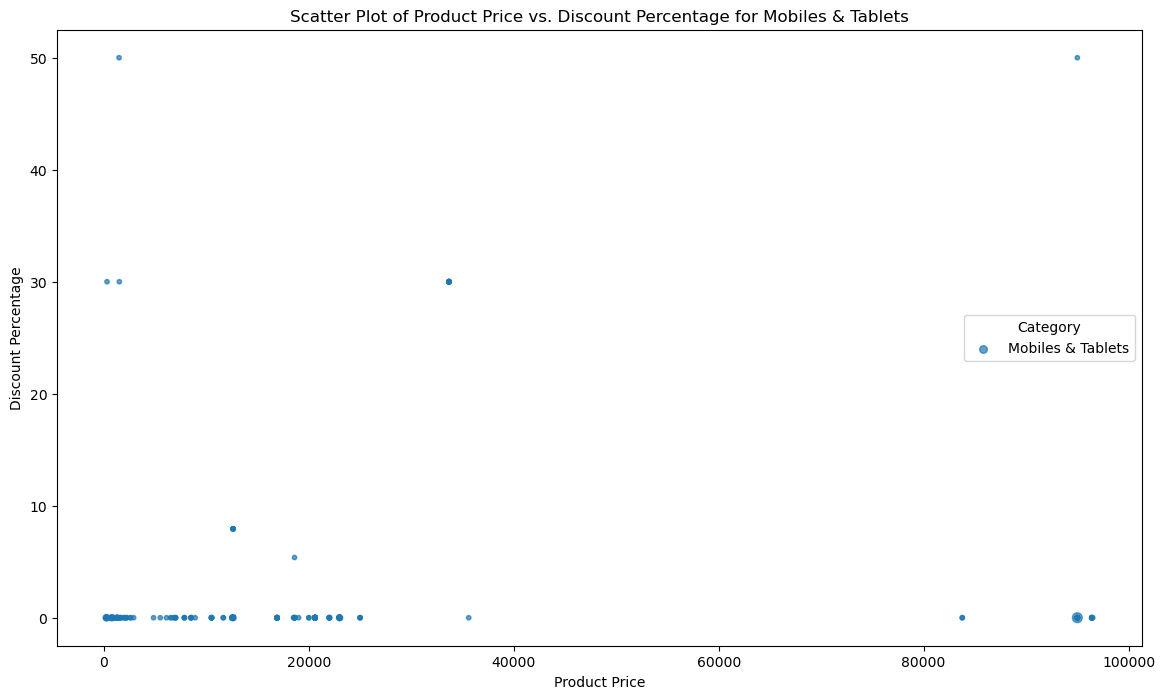

In [71]:
import matplotlib.pyplot as plt

specific_category = 'Mobiles & Tablets'  

# Filter the data for the category - 'Mobiles & Tablets'
category_data = e_commerce_dataset[e_commerce_dataset['category_name'] == specific_category]

# Create a scatter plot for the specific category
plt.figure(figsize=(14, 8))

plt.scatter(category_data['product_price'], category_data['discount_percentage'], 
            s=category_data['quantity_ordered']*10, # Size of the points proportional to quantity_ordered
            alpha=0.7, label=specific_category) # Label for the category

# Add titles and labels
plt.title(f'Scatter Plot of Product Price vs. Discount Percentage for {specific_category}')
plt.xlabel('Product Price')
plt.ylabel('Discount Percentage')
plt.legend(title='Category')

plt.show()


first lets try clustering with only two variables with the dataset :- 

##### --> "product_price" -  Original Price of the product

##### --> "quantity_ordered" - no.of quantity ordered

product_price reflects the cost of the item, and quantity_ordered shows how many units were purchased. Clustering based on these two variables can help identify different customer segments or product categories, such as high-priced items ordered in bulk versus low-cost items ordered in smaller quantities.

This combination can help identify customer purchasing behavior patterns, such as budget shoppers versus premium shoppers.

Use the iloc() function to select the two columns we want, and then we apply scaling to the data. Because K-means relies on a distance metric, scaling can have a big impact on the results. 

For example, if one of our variables had valuesfrom 10,000 to 100,000 and the other had values from 0 to 1, the Euclidean distance will end up being dominated by the first of the variables. For this reason, we will normally perform Min-Max scaling or normalisation beforecarrying out clustering.

In [72]:
from sklearn.preprocessing import StandardScaler

scaled_output = e_commerce_dataset.iloc[:,[4,5]].values
standard_scaler = StandardScaler()
scaled_output = standard_scaler.fit_transform(scaled_output)
scaled_output

array([[ 6.77141153, -0.15547929],
       [-0.34851177,  0.61933446],
       [-0.27040968, -0.15547929],
       ...,
       [-0.38707979, -0.15547929],
       [-0.32279976, -0.15547929],
       [-0.38670823, -0.15547929]])

Additionally, we will apply the elbow method to determine the ideal number of K-means clusters. 

The within cluster sum of squares (wcss) for the data with different values of k is calculated using the elbow method. The reduction of this value is the goal of K-means clustering. As a result, we can plot the evolution of wcss with increasing cluster count. 

When we add more clusters, the wcss tends to decrease more slowly after a certain point. It initially decreases quickly. The "elbow" in the graph, where the decline in wcss slows down, represents the optimal number of clusters. 

This code makes use of Scitkit. Acquire the knowledge of executing K-means clustering, wherein k can range from 1 to 10, and store the resultant WCS in an array. Next, we use matplotlib to plot this.

I want to make one thing clear to you here. I've noticed that random_state = 42 is used by most people; I have also used it. There is a single fixed shuffled dataset for random_state value 42, as shown in the above image. It implies that a shuffled dataset will be returned each time we use 42 as random_state.

/Users/macbookair/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/macbookair/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/macbookair/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/macbookair/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

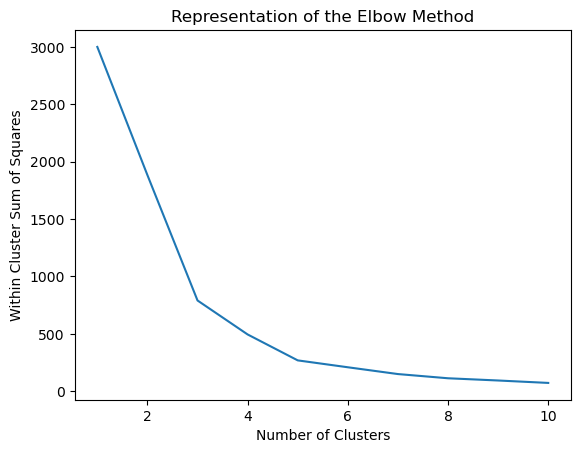

In [73]:
#using the elbow method top find the optimal number of clusters
from sklearn.cluster import KMeans
within_cluster_sum_of_squares = []
for i in range(1,11):
    k_means = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    k_means.fit(scaled_output)
    within_cluster_sum_of_squares.append(k_means.inertia_)
plt.plot(range(1,11),within_cluster_sum_of_squares)
plt.title('Representation of the Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.show()

Now we have identified the optimal number of clusters we can use the fit_predict() method to train a KMeans() method on the dataset "e_commerce_dataset" is 3 since the elbow in the graph shown above is at 3. Hence, we can write the code so as to fit the K-means Clustering into our dataset

In [74]:
#fitting k-means to the dataset
k_means = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42) 
# since from the elbow method, we got that the number of clusters thats possible here is 3
result_of_kmeans= k_means.fit_predict(scaled_output)
scaled_output[result_of_kmeans]

/Users/macbookair/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([[-0.34851177,  0.61933446],
       [ 6.77141153, -0.15547929],
       [ 6.77141153, -0.15547929],
       ...,
       [ 6.77141153, -0.15547929],
       [ 6.77141153, -0.15547929],
       [ 6.77141153, -0.15547929]])

We can plot a scatterplot of the resultant data with the cluster assignments and centroids displayed by using the code below, which displays each cluster in a different color. The colors will distinct the clusters for better understandings

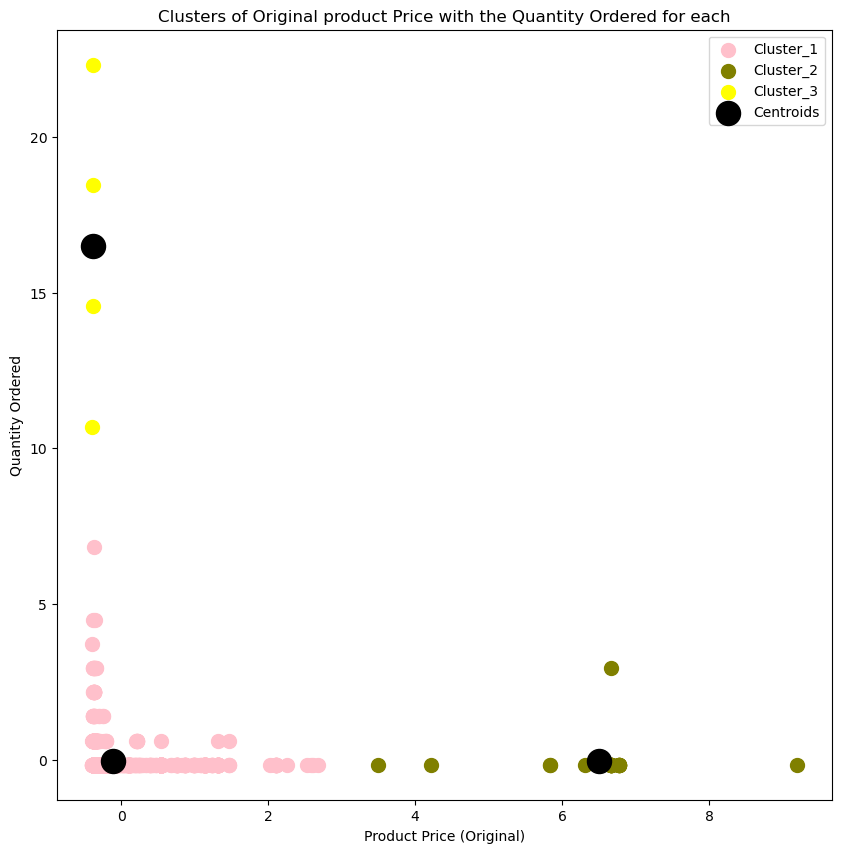

In [75]:
#visualizing the clusters
plt.figure(figsize=(10,10))
plt.scatter(scaled_output[result_of_kmeans == 0,0],scaled_output[result_of_kmeans == 0,1], s= 100, c = 'pink', label = 'Cluster_1')
plt.scatter(scaled_output[result_of_kmeans == 1,0],scaled_output[result_of_kmeans == 1,1], s= 100, c = 'Olive', label = 'Cluster_2')
plt.scatter(scaled_output[result_of_kmeans == 2,0],scaled_output[result_of_kmeans == 2,1], s= 100, c = 'yellow', label = 'Cluster_3')
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1], s= 300, c = 'black', label = 'Centroids')
plt.ylabel('Quantity Ordered')
plt.xlabel('Product Price (Original)')
plt.title('Clusters of Original product Price with the Quantity Ordered for each')
plt.legend()
plt.show()

The Silhouette Score is a metric used to calculate the goodness of a clustering technique (such as K-Means) on a given dataset. It provides a measure of how well-defined the clusters are in the data.

In [76]:
from sklearn.metrics import silhouette_score
# Get cluster assignments for each data point
labels = k_means.labels_

# Get centroids of clusters
centroids = k_means.cluster_centers_

# Calculate silhouette score
silhouette_avg = silhouette_score(scaled_output, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.906305283568845


### High Silhouette Score (0.9063) suggests that the clusters formed are well-defined, with customers within the same cluster showing similar purchasing patterns.


Now, let's try the same with another two most-suited data fields given below:

##### grand_total --> represents the total amount spent on an order

##### discount_amount --> shows how much was discounted from the original price

This pair can help identify which customers or orders are heavily influenced by discounts or promotions.

In [77]:
from sklearn.preprocessing import StandardScaler

scaled_output_2 = e_commerce_dataset.iloc[:,[6,10]].values
standard_scaler = StandardScaler()
scaled_output_2 = standard_scaler.fit_transform(scaled_output_2)
scaled_output_2

array([[ 4.76652004, -0.07740616],
       [-0.32483881, -0.07740616],
       [-0.3006686 , -0.07740616],
       ...,
       [-0.38462266, -0.07740616],
       [-0.33836772, -0.07740616],
       [-0.38435529, -0.07740616]])

/Users/macbookair/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/macbookair/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/macbookair/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/macbookair/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

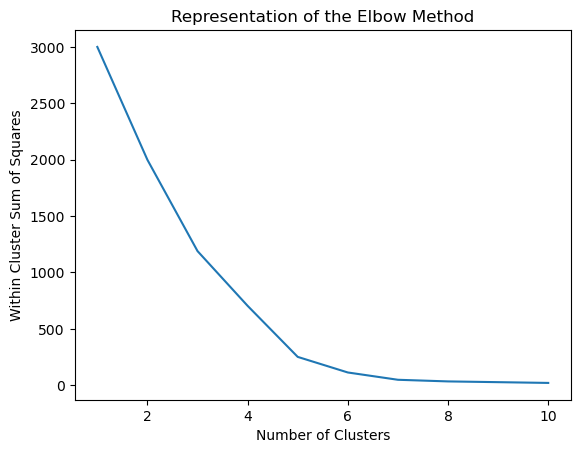

In [78]:
#using the elbow method top find the optimal number of clusters
from sklearn.cluster import KMeans
within_cluster_sum_of_squares = []
for i in range(1,11):
    k_means = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    k_means.fit(scaled_output_2)
    within_cluster_sum_of_squares.append(k_means.inertia_)
plt.plot(range(1,11),within_cluster_sum_of_squares)
plt.title('Representation of the Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.show()

In [79]:
#fitting k-means to the dataset
k_means = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42) 
# since from the elbow method, we got that the number of clusters thats possible here is 5
result_of_kmeans= k_means.fit_predict(scaled_output_2)
scaled_output[result_of_kmeans]

/Users/macbookair/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([[ 6.77141153, -0.15547929],
       [-0.27040968, -0.15547929],
       [-0.27040968, -0.15547929],
       ...,
       [-0.27040968, -0.15547929],
       [-0.27040968, -0.15547929],
       [-0.27040968, -0.15547929]])

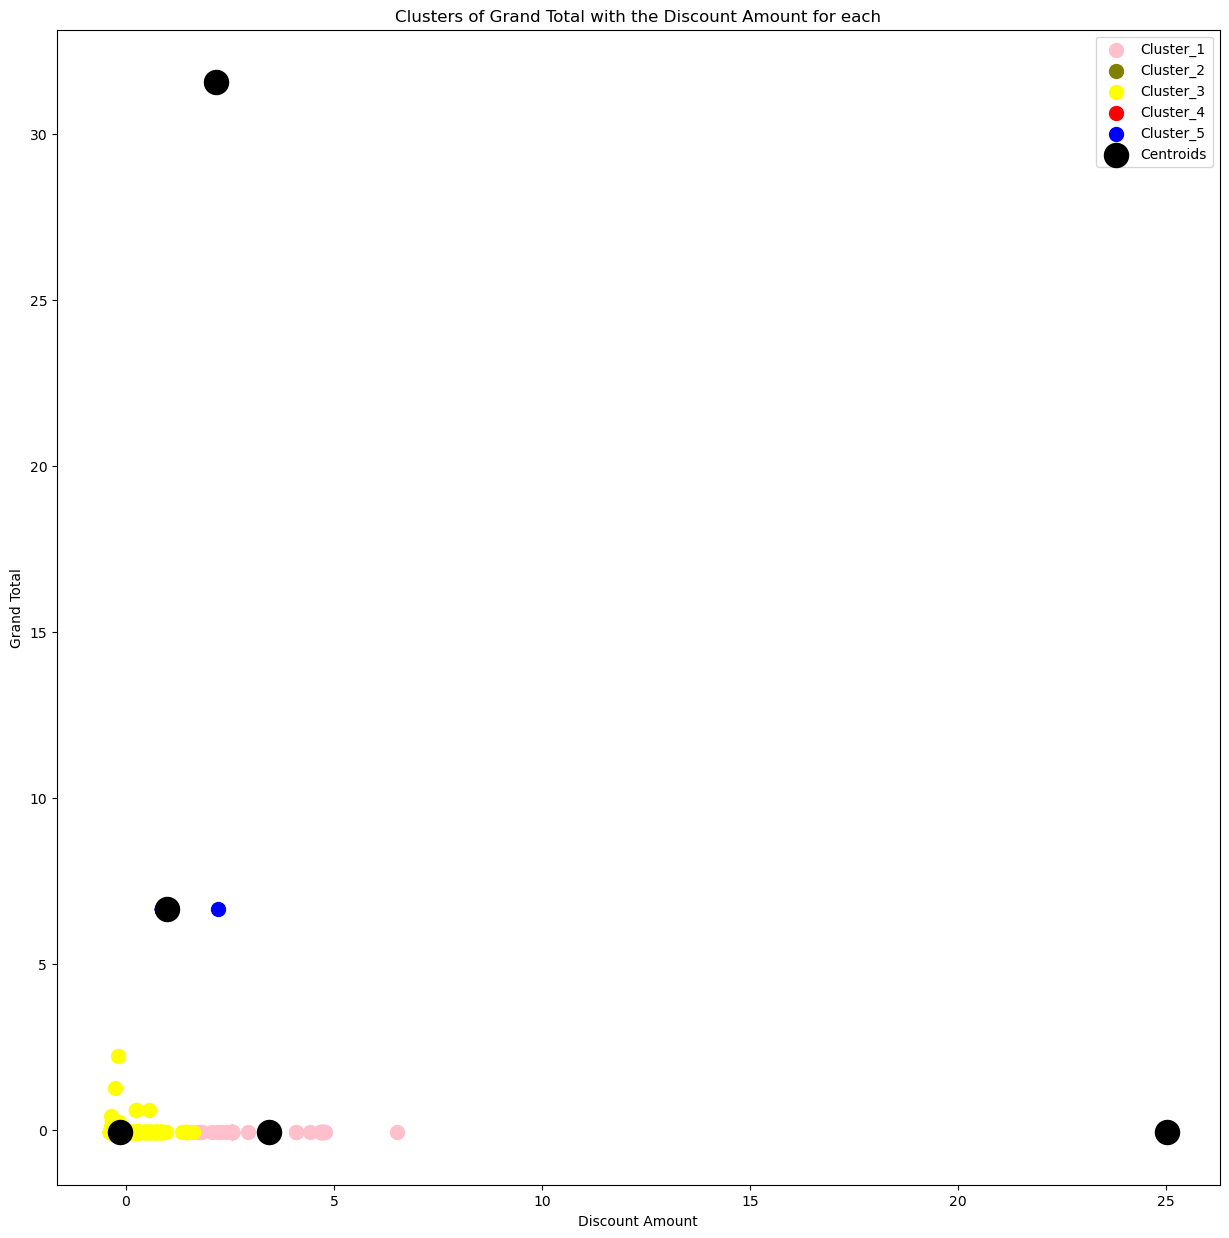

In [80]:
#visualizing the clusters
plt.figure(figsize=(15,15))
plt.scatter(scaled_output_2[result_of_kmeans == 0,0],scaled_output_2[result_of_kmeans == 0,1], s= 100, c = 'pink', label = 'Cluster_1')
plt.scatter(scaled_output_2[result_of_kmeans == 1,0],scaled_output_2[result_of_kmeans == 1,1], s= 100, c = 'Olive', label = 'Cluster_2')
plt.scatter(scaled_output_2[result_of_kmeans == 2,0],scaled_output_2[result_of_kmeans == 2,1], s= 100, c = 'yellow', label = 'Cluster_3')
plt.scatter(scaled_output_2[result_of_kmeans == 3,0],scaled_output_2[result_of_kmeans == 3,1], s= 100, c = 'red', label = 'Cluster_4')
plt.scatter(scaled_output_2[result_of_kmeans == 4,0],scaled_output_2[result_of_kmeans == 4,1], s= 100, c = 'blue', label = 'Cluster_5')
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1], s= 300, c = 'black', label = 'Centroids')
plt.ylabel('Grand Total')
plt.xlabel('Discount Amount')
plt.title('Clusters of Grand Total with the Discount Amount for each')
plt.legend()
plt.show()

In [82]:
from sklearn.metrics import silhouette_score
# Get cluster assignments for each data point
labels = k_means.labels_

# Get centroids of clusters
centroids = k_means.cluster_centers_

# Calculate silhouette score
silhouette_avg = silhouette_score(scaled_output_2, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.8921299493546397


### Applying Hierarchical Clustering Algorithm to the dataset named "e_commerce_dataset"

Run the cell below to import the required function, and then to performhierarchical clustering and plot the resulting dendrogram. 

If you draw ahorizontal line across the dendrogram, the number of vertical lines crossing theline equates to the number of clusters. 

For example, from the below we couldend the clustering process at the point where the Euclidean distance is 12 andthis would give us three clusters (one formed of the orange data points, oneformed of the green data points, and one formed of the red data points shown onthe dendrogram). However, typically we take a horizontal line around halfwaydown the dendrogram to identify the optimal number of clusters, which in thiscase gives us five.

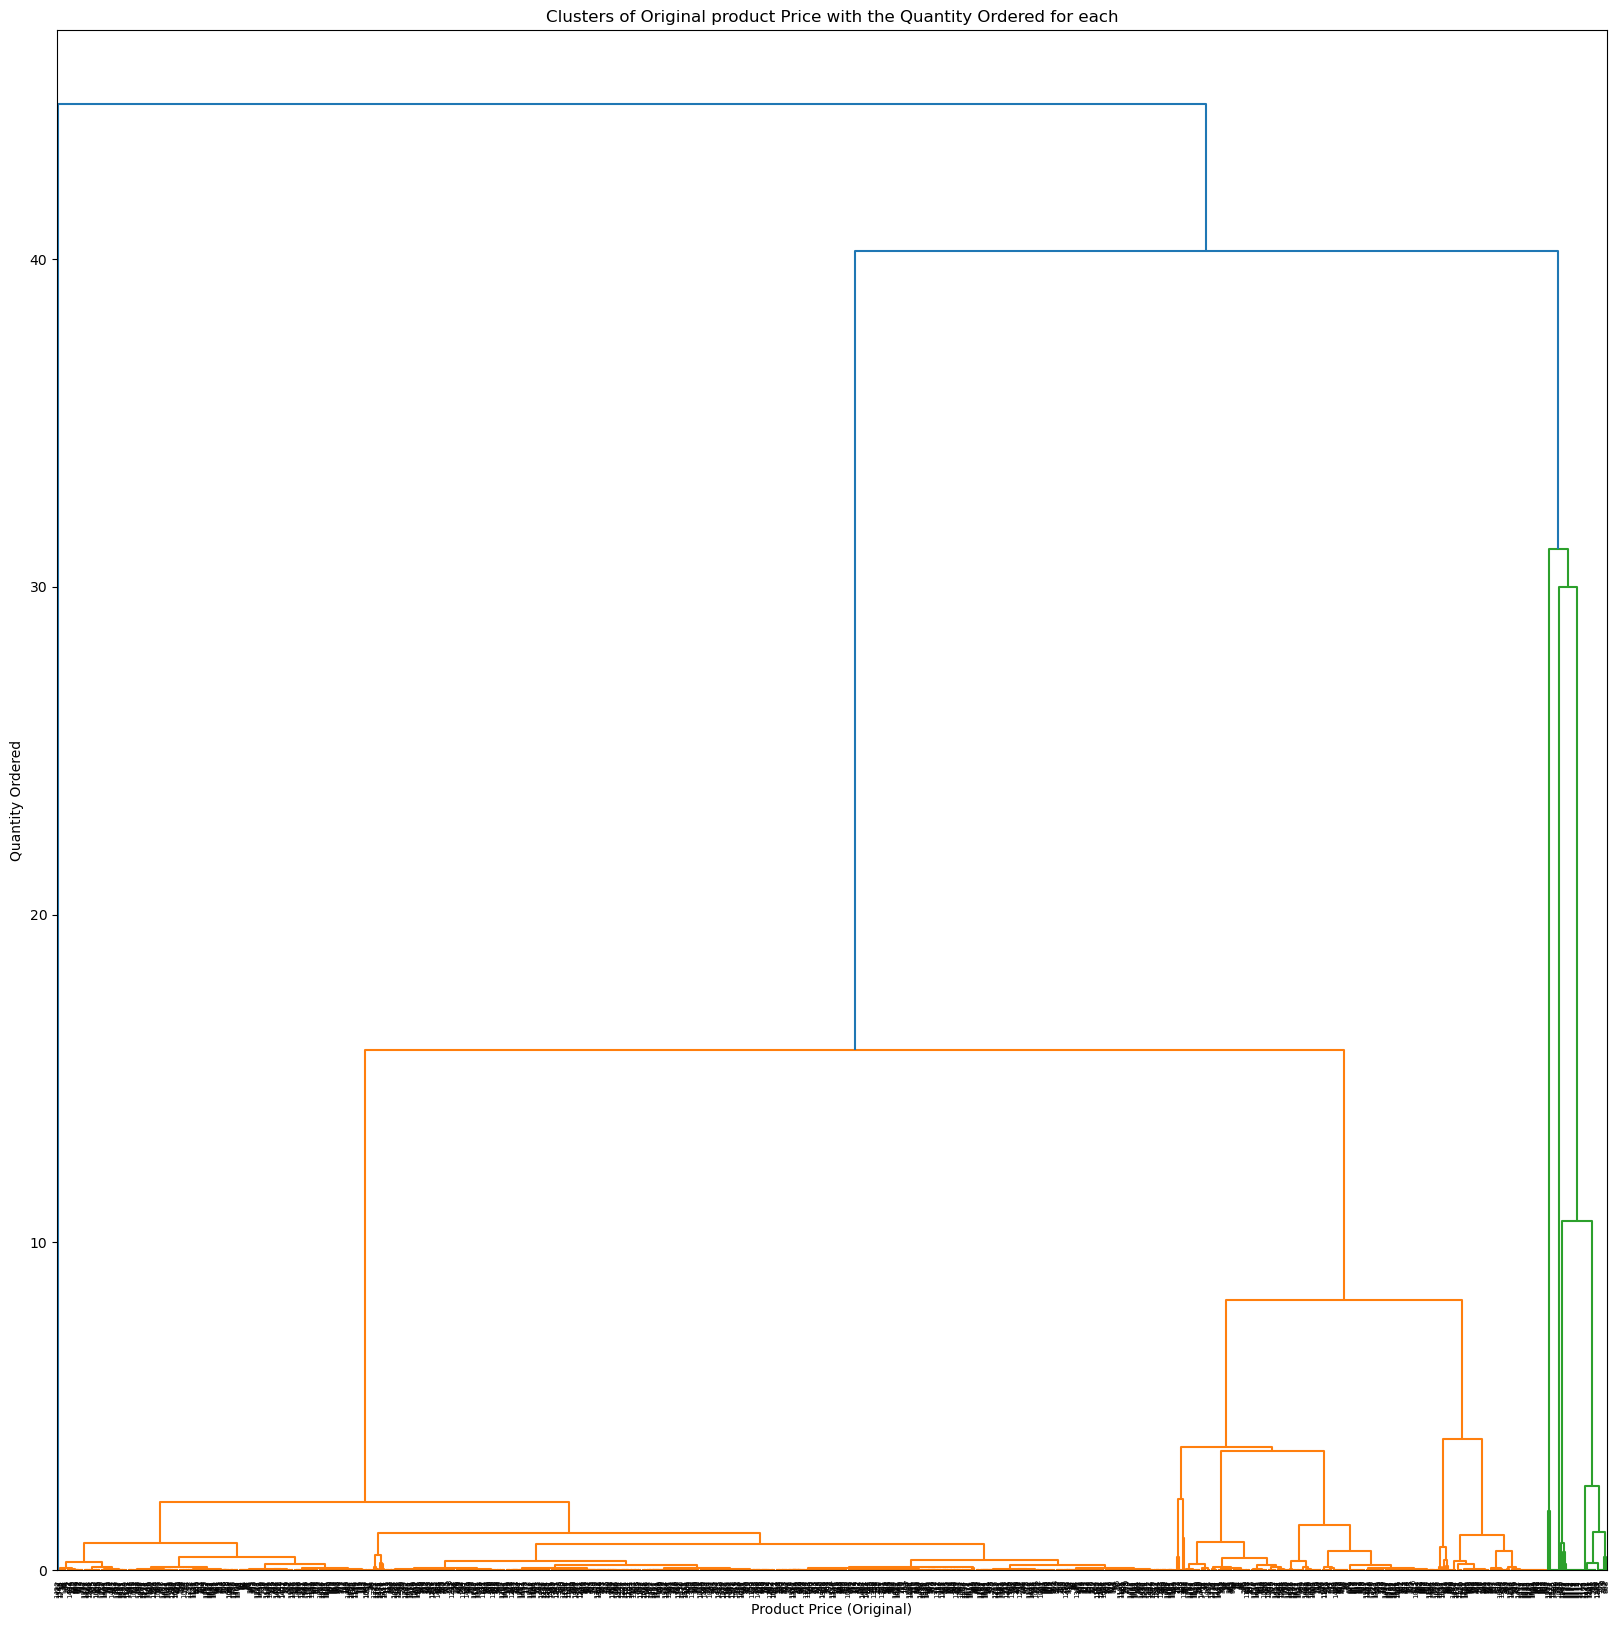

In [48]:
#using the dendogram to find the optimal number of clusters:
import scipy.cluster.hierarchy as sch

plt.figure(figsize =(20,20))
dendrogram_bank = sch.dendrogram(sch.linkage(scaled_output_2, method = 'ward'))
plt.ylabel('Quantity Ordered')
plt.xlabel('Product Price (Original)')
plt.title('Clusters of Original product Price with the Quantity Ordered for each')
plt.show()